In [1]:
import arviz as az
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import pymc as pm

print(f"Running on PyMC v{pm.__version__}")

Running on PyMC v5.1.2


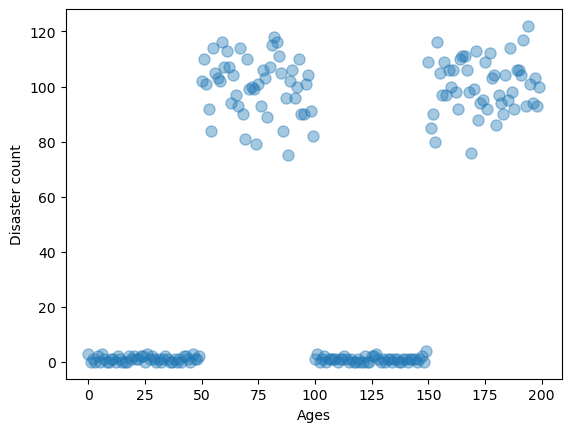

In [3]:
# fmt: off
from numpy import random 

data1 = random.poisson(lam = 1, size = 50)
data2 = random.poisson(lam = 100, size = 50)
data3 = random.poisson(lam = 1, size = 50)
data4 = random.poisson(lam = 100,size = 50)

zircons_data = np.concatenate([data1,data2,data3,data4])
ages_nominal = np.arange(0, 200)

plt.plot(ages_nominal, zircons_data, "o", markersize=8, alpha=0.4)
plt.ylabel("Disaster count")
plt.xlabel("Ages");

In [5]:
tr =pm.distributions.transforms

Order = tr.Ordered()

#Logodd = tr.LogOddsTransform()

#chain_tran = tr.Chain([Logodd, Order])

In [6]:
with pm.Model() as model:
    
    k =3
    
    rates = pm.Exponential("rates",1.0,shape = k + 1)
    
    switchpoints = pm.Uniform("switchpoints", lower = 0, upper = 200 , shape = k, transform = Order,  initval=np.linspace(1,199,k))
    #x = pm.Uniform("x", 0.0, 1.0, shape = n, transform = chain_tran)
    
    rate = rates[0]
    for i in range(k):
        rate = pm.math.switch(switchpoints[i] >= ages_nominal, rate, rates[i+1])
        
    disasters = pm.Poisson("counts", rate, observed=zircons_data)
    
    tr35000 = pm.sample(draws = 10000,  tune = 25000, cores = 1)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [rates, switchpoints]


In [7]:
with model:
    az.plot_trace(tr35000)
    
pm.summary(tr35000)